## Stroke data

This dataset is designed to be used to predict whether a patient is likely to get stroke based a variety of factors such as gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. I downloaded and ran some code which examines the data and generates some nice visualisations before going on to build a prediction model. I removed some of the later code which was geared towards building the model so that I was able to generate my visualisations of the data using the original, unaltered data.

Below is the code I downloaded and ran initially.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [3]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe() 


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df["heart_disease"].value_counts()


heart_disease
0    4834
1     276
Name: count, dtype: int64

In [8]:
df["smoking_status"].value_counts()


smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

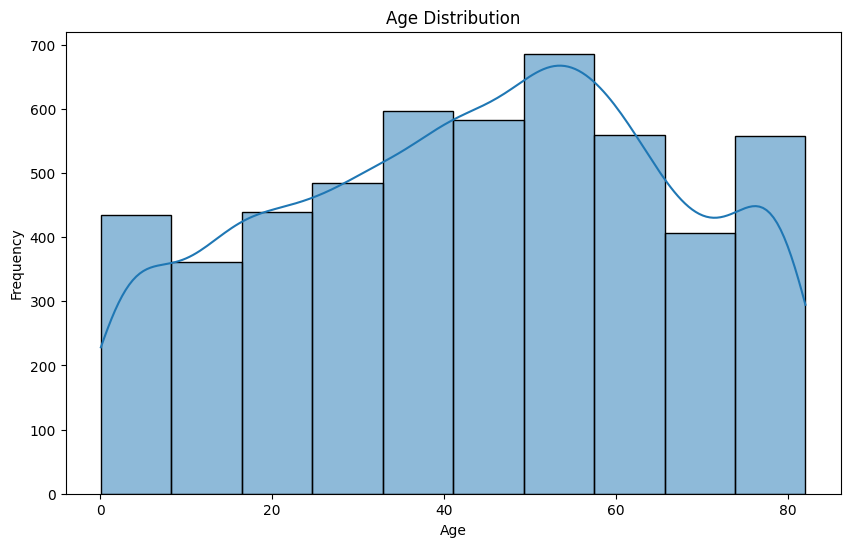

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

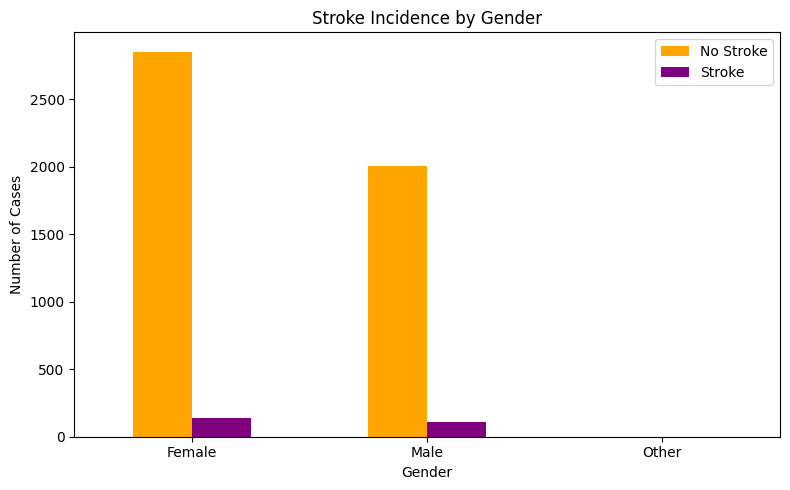

In [10]:
# Select only the relevant columns
data = df[['id', 'gender', 'stroke']]

# Group by gender and stroke status, then count occurrences
gender_stroke_counts = data.groupby(['gender', 'stroke']).size().unstack()

# Create a bar chart
gender_stroke_counts.plot(kind='bar', figsize=(8, 5), color=['orange', 'purple'])

# Add labels and title
plt.title('Stroke Incidence by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.legend(['No Stroke', 'Stroke'])

# Show the plot
plt.tight_layout()
plt.show()

# Heatmap of Correlations

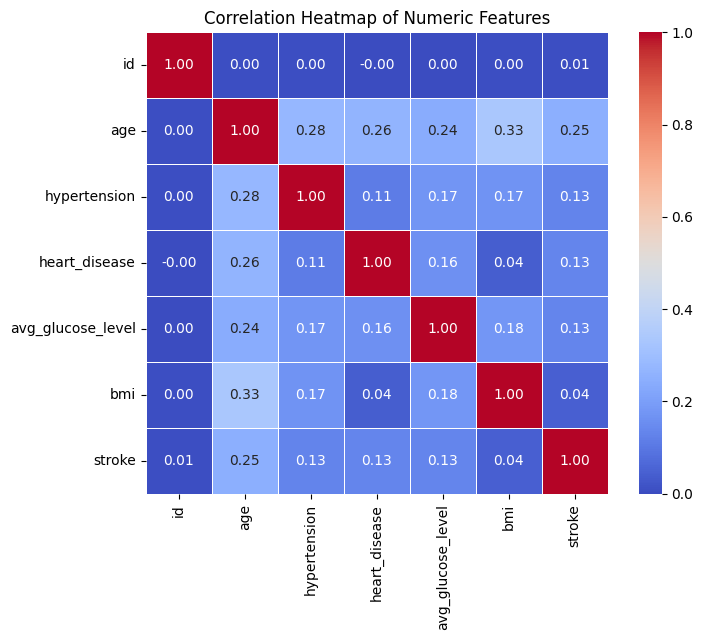

In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Feature Engineering

In [12]:
# Calculate average BMI for males and females
average_bmi_male = df[df['gender'] == 'Male']['bmi'].mean()
average_bmi_female = df[df['gender'] == 'Female']['bmi'].mean()

# Fill missing BMI values based on gender
df['bmi'] = df.apply(
    lambda row: average_bmi_male if row['gender'] == 'Male' and pd.isna(row['bmi']) else row['bmi'], axis=1)
df['bmi'] = df.apply(
    lambda row: average_bmi_female if row['gender'] == 'Female' and pd.isna(row['bmi']) else row['bmi'], axis=1)

In [13]:
# Change gender from 'Other' to 'Female'
df.loc[df['gender'] == 'Other', 'gender'] = 'Female'

In [14]:
# BMI Binning
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 40], labels=['Underweight', 'Normal', 'Overweight', 'Obese'], right=False)

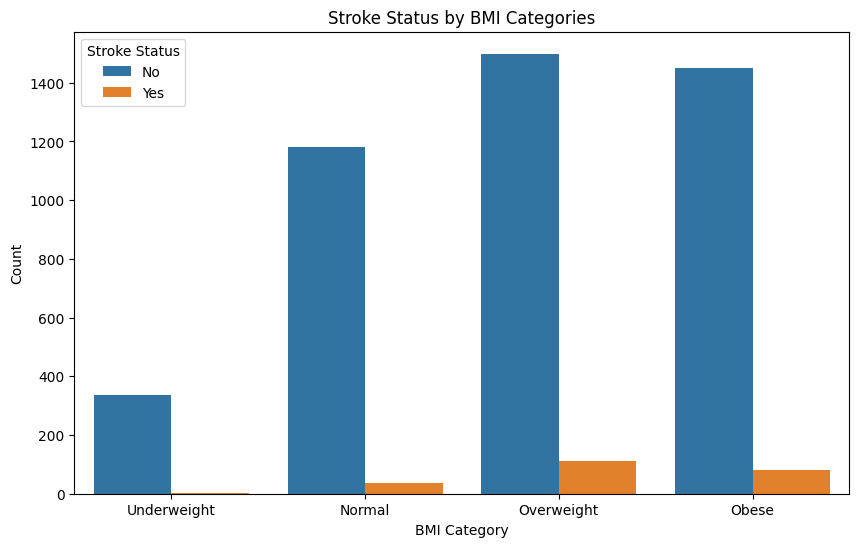

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bmi_category', hue='stroke')
plt.title('Stroke Status by BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Stroke Status', labels=['No', 'Yes'])
plt.show()

## My visualisations of the data

Below is code I wrote or adjusted in order to create some new visualisations of the data.

First I generate a simple bar chart to illustrate the imbalance between the classes 'stroke' and 'no stroke'.

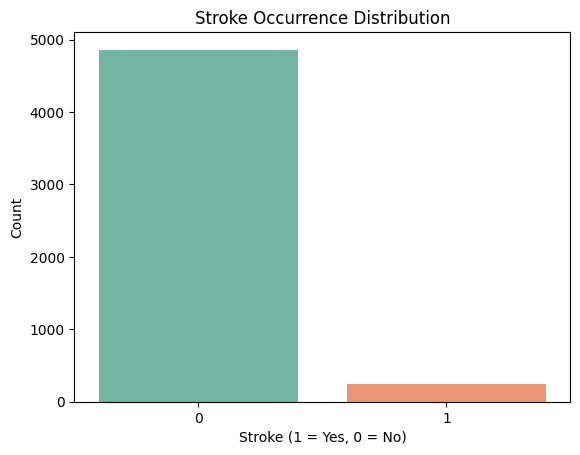

In [16]:
sns.countplot(data=df, x='stroke', palette='Set2')
plt.title('Stroke Occurrence Distribution')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

Next, I construct a boxplot to show the distributions of ages by stroke status.

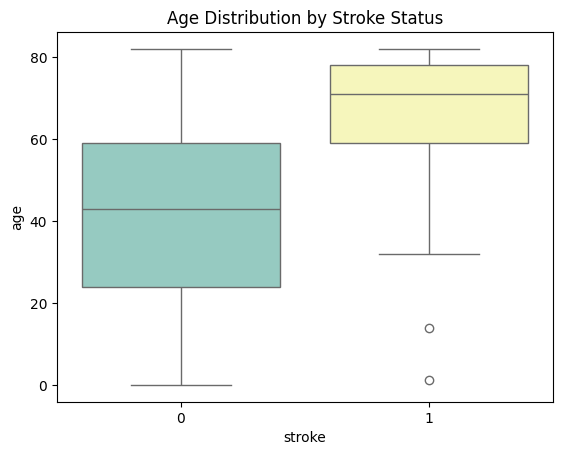

In [17]:
sns.boxplot(data=df, x='stroke', y='age', palette='Set3')
plt.title('Age Distribution by Stroke Status')
plt.show()

Additionally, I noted in the original code they produced a histogram of the distribution of ages in the dataset with a nice smooth KDE line. I decided to extend this to a similar plot but separting the data by stroke status so I have 2 smooth plots to compare in one diagram.

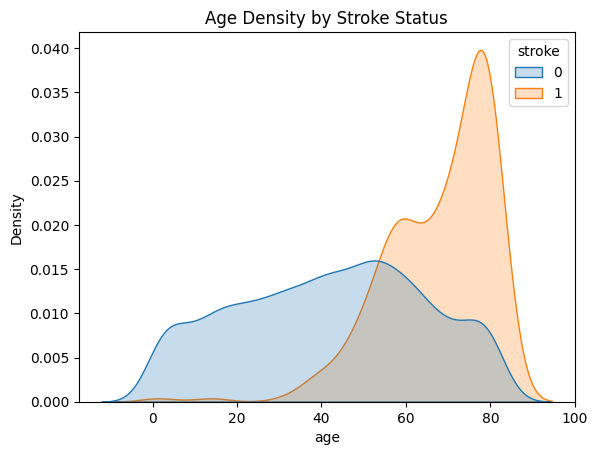

In [18]:
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, common_norm=False)
plt.title('Age Density by Stroke Status')
plt.show()

Next I inspect all the categorical variables in closer detail in individual plots, again separating the data by stroke status.

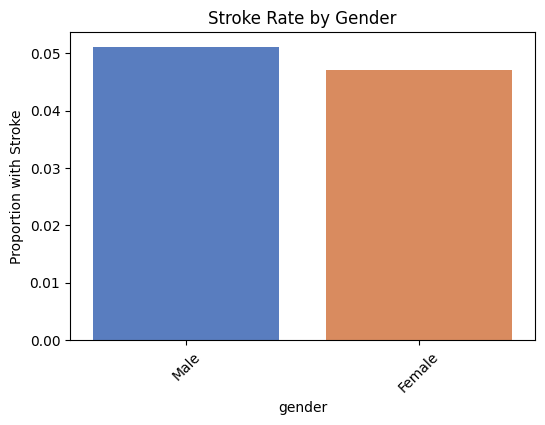

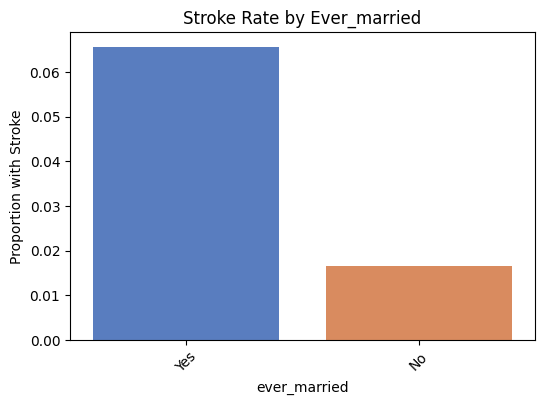

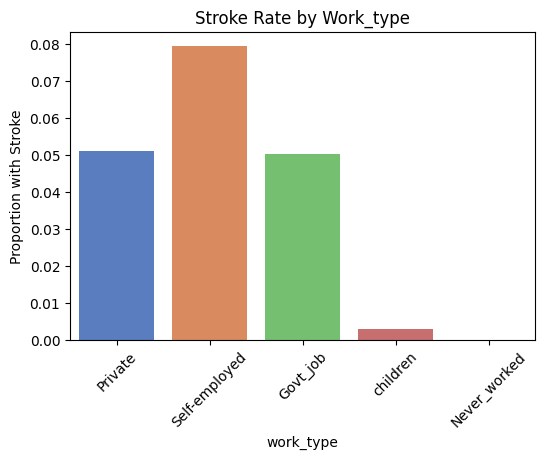

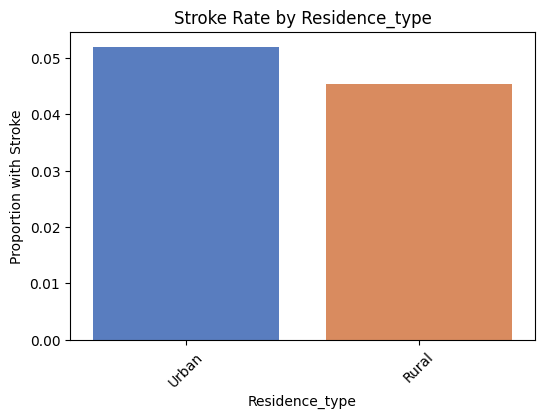

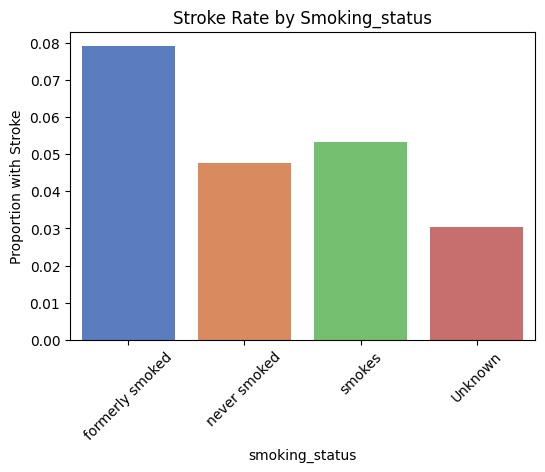

In [19]:
categorical_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for var in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.barplot(data=df, x=var, y='stroke', palette='muted', errorbar=None)
    plt.title(f'Stroke Rate by {var.capitalize()}')
    plt.xticks(rotation=45)
    plt.ylabel('Proportion with Stroke')
    plt.show()

Finally, I generated a scatter plot to help visualise the correlation between BMI, Glucose & Stroke, again distinguishing between the datapoints by stroke status. 

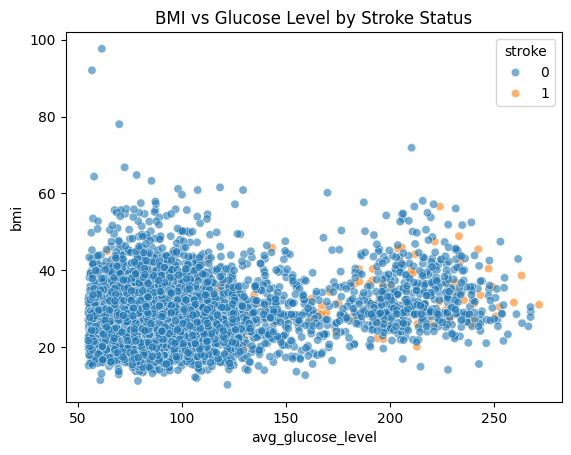

In [20]:
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='stroke', alpha=0.6)
plt.title('BMI vs Glucose Level by Stroke Status')
plt.show()